In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
import librosa as lb
from librosa import display

In [ ]:
# train=np.load("audio_train.npy")
# test=np.load("audio_test.npy")

from google.colab import drive
drive.mount('/content/gdrive')
train=np.load("gdrive/My Drive/audio-classification/audio_train.npy")
test=np.load("gdrive/My Drive/audio-classification/audio_test.npy")

Mounted at /content/gdrive


In [ ]:
train.shape

(942, 30000)

In [ ]:
type(train)

numpy.ndarray

In [ ]:
train

array([[-0.92577249, -0.66291571, -0.26374164, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94556701,  1.11562371,  1.10488427, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01025403, -0.01226821, -0.01267925, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00239253,  1.10180998,  1.03759027, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00936416, -0.01141811, -0.01222591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87232733, -0.1913518 ,  0.57717735, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#train_labels=pd.read_csv("labels_train.csv",usecols=['label']).to_numpy()
train_labels=pd.read_csv("gdrive/My Drive/audio-classification/labels_train.csv",usecols=['label']).to_numpy()

In [ ]:
train_labels

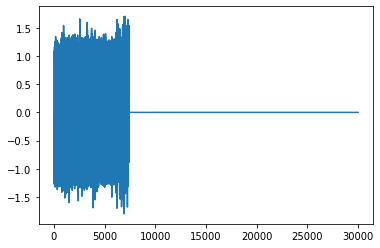

In [ ]:
plt.plot(train[0])

In [ ]:
train.shape

(942, 30000)

# Audio Augementation - Pitch Change

In [ ]:
pitch_pm = 2
pitch_change =  pitch_pm * 2*(np.random.uniform())
print("pitch_change = ",pitch_change)
pitch_changed_train = []
for i in range(train.shape[0]):
    pitch_changed = lb.effects.pitch_shift(train[i], sr=22050, n_steps=pitch_change)
    pitch_changed_train.append(pitch_changed)

pitch_change =  3.9273919282477214


In [ ]:
pitch_changed_train = np.asarray(pitch_changed_train)

In [ ]:
pitch_changed_train

array([[-0.84842313, -0.66843575, -0.12130386, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86659767,  1.20266019,  1.0443427 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01075705, -0.0149321 , -0.01389849, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.92818446,  1.19639458,  0.99937606, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00914237, -0.01319467, -0.01334281, ...,  0.        ,
         0.        ,  0.        ],
       [-0.74976512, -0.03606314,  0.88401547, ...,  0.        ,
         0.        ,  0.        ]])

# Audio Augementation - Speed Change

In [ ]:
speed_change = np.random.uniform(low=0.9,high=1.1)
print("speed_change = ",speed_change)

train_for_speed_change = train

speed_changed_train = []

for i in range(train_for_speed_change.shape[0]):
    tmp = lb.effects.time_stretch(train_for_speed_change[i], speed_change)
    minlen = min(train_for_speed_change[i].shape[0], tmp.shape[0])
    train_for_speed_change[i] *= 0 
    train_for_speed_change[i][0:minlen] = tmp[0:minlen]
    speed_changed_train.append(train_for_speed_change[i])

speed_change =  1.0106194973712659


In [ ]:
speed_changed_train = np.asarray(speed_changed_train)

In [ ]:
speed_changed_train

array([[-0.92259187, -0.66041408, -0.26150206, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94316126,  1.11298957,  1.10270503, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01023608, -0.01224612, -0.0126563 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00045472,  1.09963682,  1.03571167, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00923806, -0.01128018, -0.01208696, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87019269, -0.19035313,  0.57683626, ...,  0.        ,
         0.        ,  0.        ]])

# Audio Augementation - Amplify Value

In [ ]:
dyn_change = np.random.uniform(low=1.5,high=3)
amplified_train = []
print("dyn_change = ",dyn_change)
for i in range(train.shape[0]):
    temp_train = train[i] * dyn_change
    amplified_train.append(temp_train)

dyn_change =  1.8383095372714169


In [ ]:
amplified_train = np.asarray(amplified_train)

In [ ]:
amplified_train

array([[-1.69600942, -1.2140455 , -0.48072174, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.73382234,  2.04601933,  2.02711317, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01881709, -0.02251215, -0.02326619, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.83914546,  2.02147286,  1.90395863, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01698241, -0.02073647, -0.02221958, ...,  0.        ,
         0.        ,  0.        ],
       [-1.59968353, -0.34992797,  1.0604036 , ...,  0.        ,
         0.        ,  0.        ]])

# Audio Augementation - Adding Distribution Noise

In [ ]:
noise_train = []
for i in range(train.shape[0]):
    noise_amp = 0.005*np.random.uniform()*np.amax(train[i])
    y_noise = train[i] + noise_amp * np.random.normal(size=train[i].shape[0])
    noise_train.append(y_noise)

In [ ]:
noise_train = np.asarray(noise_train)

In [ ]:
noise_train.shape

(942, 30000)

# Audio Augementation - Apply HPSS

In [ ]:
# hpss_train =[]
# for i in range(train.shape[0]):
#     y_hpss = lb.effects.hpss(train[i])
#     hpss_train.append(y_hpss)

In [ ]:
#hpss_train = np.asarray(hpss_train)

In [ ]:
#hpss_train

# Merge Augmented Data - Bigger Training Set in 1 D then convert it to 2 D Spectograms 

In [ ]:
train_pitched_changed_append = np.append(train, pitch_changed_train, 0)

In [ ]:
train_pitched_changed_append.shape

(1884, 30000)

In [ ]:
trainPitchChanged_speedChangedTrain_append = np.append(train_pitched_changed_append, speed_changed_train, 0)

In [ ]:
trainPitchChanged_speedChangedTrain_append.shape

(2826, 30000)

In [ ]:
trainPitchChangedSpeedChangedTrain_aplifiedTrain_append = np.append(trainPitchChanged_speedChangedTrain_append, amplified_train, 0)

In [ ]:
trainPitchChangedSpeedChangedTrain_aplifiedTrain_append.shape

(3768, 30000)

In [ ]:
train_final = np.append(trainPitchChangedSpeedChangedTrain_aplifiedTrain_append, noise_train, 0)

In [ ]:
train_final.shape

(4710, 30000)

In [ ]:
train_Mel_spectograms = []
for i in range(train_final.shape[0]):
    D = np.abs(lb.stft(train_final[i]))**2
    S = lb.feature.melspectrogram(S=D)
    S = lb.feature.melspectrogram(train_final[i])
    Xdb = lb.power_to_db(S)
    #Xdb = lb.amplitude_to_db(abs(spectogram))
    train_Mel_spectograms.append(Xdb)

In [ ]:
train_Mel_spectograms = np.array(train_Mel_spectograms)

In [ ]:
type(train_Mel_spectograms)

numpy.ndarray

In [ ]:
train_Mel_spectograms

array([[[ 24.05211298,  19.86922029,  17.14318085, ..., -41.59613547,
         -41.59613547, -41.59613547],
        [ 17.51882893,  12.85637177,  11.19730786, ..., -41.59613547,
         -41.59613547, -41.59613547],
        [  8.74713318,   9.33328386,  12.49118485, ..., -41.59613547,
         -41.59613547, -41.59613547],
        ...,
        [-35.5595595 , -41.58017253, -41.59613547, ..., -41.59613547,
         -41.59613547, -41.59613547],
        [-35.64682438, -41.59613547, -41.59613547, ..., -41.59613547,
         -41.59613547, -41.59613547],
        [-35.70254358, -41.59613547, -41.59613547, ..., -41.59613547,
         -41.59613547, -41.59613547]],

       [[ 21.19295444,  18.08661343,  18.40809635, ..., -38.57538854,
         -38.57538854, -38.57538854],
        [ 17.54878887,  18.64272501,  16.23474281, ..., -38.57538854,
         -38.57538854, -38.57538854],
        [ 18.5983158 ,  18.53057558,  15.50343603, ..., -38.57538854,
         -38.57538854, -38.57538854],
        ...,


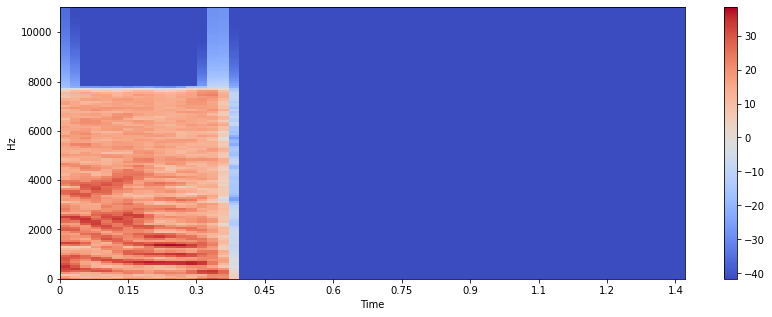

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(train_Mel_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

# Making Labels Consistents 

In [ ]:
train_labels.shape

(942, 1)

In [ ]:
new_labels = train_labels
for i in range(0,4):
    train_labels_final = np.append(train_labels,new_labels,0)
    train_labels = train_labels_final

In [ ]:
train_labels_final.shape

(4710, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_Mel_spectograms, train_labels, test_size=0.40, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2826, 128, 59)
(1884, 128, 59)
(2826, 1)
(1884, 1)


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2826, 128, 59, 1)
(1884, 128, 59, 1)
(2826, 1)
(1884, 1)


In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=X_train[0].shape))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3),activation='relu'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=X_train[0].shape))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 57, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 8, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 6, 64)         36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 57, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 8, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 6, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 6912)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test,y_test),callbacks=[es])

Epoch 1/10
89/89 [==============================] - 1s 12ms/step - loss: 2.1811 - accuracy: 0.2541 - val_loss: 1.9603 - val_accuracy: 0.3105
Epoch 2/10
89/89 [==============================] - 1s 8ms/step - loss: 1.3023 - accuracy: 0.5513 - val_loss: 0.8547 - val_accuracy: 0.6969
Epoch 3/10
89/89 [==============================] - 1s 8ms/step - loss: 0.5876 - accuracy: 0.8050 - val_loss: 0.4411 - val_accuracy: 0.8583
Epoch 4/10
89/89 [==============================] - 1s 8ms/step - loss: 0.3274 - accuracy: 0.8868 - val_loss: 0.2628 - val_accuracy: 0.9172
Epoch 5/10
89/89 [==============================] - 1s 8ms/step - loss: 0.2243 - accuracy: 0.9197 - val_loss: 0.1665 - val_accuracy: 0.9448
Epoch 6/10
89/89 [==============================] - 1s 8ms/step - loss: 0.1064 - accuracy: 0.9674 - val_loss: 0.1042 - val_accuracy: 0.9655
Epoch 7/10
89/89 [==============================] - 1s 8ms/step - loss: 0.1082 - accuracy: 0.9643 - val_loss: 0.1649 - val_accuracy: 0.9506
Epoch 00007: early 

In [ ]:
test.shape

(558, 30000)

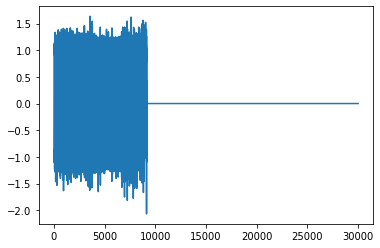

In [ ]:
plt.plot(test[0])

In [ ]:
test_Mel_spectograms = []
for i in range(test.shape[0]):
#     spectogram = lb.stft(test[i])
#     Xdb = lb.amplitude_to_db(abs(spectogram))
#     test_spectograms.append(Xdb)
    D = np.abs(lb.stft(test[i]))**2
    S = lb.feature.melspectrogram(S=D)
    S = lb.feature.melspectrogram(test[i])
    Xdb = lb.power_to_db(S)
    #Xdb = lb.amplitude_to_db(abs(spectogram))
    test_Mel_spectograms.append(Xdb)

In [ ]:
test_Mel_spectograms = np.array(test_Mel_spectograms)

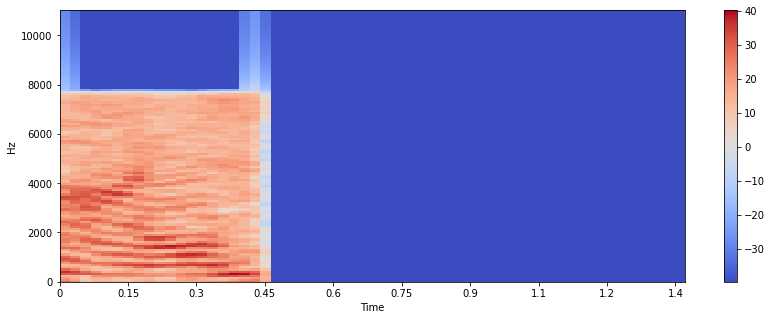

In [ ]:
plt.figure(figsize=(14, 5))
lb.display.specshow(test_Mel_spectograms[0], x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
test_Mel_spectograms.shape

(558, 128, 59)

In [ ]:
test_Mel_spectograms = test_Mel_spectograms.reshape(test_Mel_spectograms.shape[0],test_Mel_spectograms.shape[1],test_Mel_spectograms.shape[2],1)

In [ ]:
test_Mel_spectograms.shape

(558, 128, 59, 1)

In [ ]:
predictions = model.predict(test_Mel_spectograms)

In [ ]:
predictions

array([[  1.1256144 ,   8.733027  , -21.120308  , ...,   1.6932967 ,
         -1.6731931 ,   1.705358  ],
       [ -1.6659043 ,   7.833048  , -18.32935   , ...,   3.267656  ,
         -0.13242218,  11.969563  ],
       [ -1.9419446 ,   6.3769417 , -20.357712  , ...,   2.1073382 ,
          3.848801  ,  -7.2279143 ],
       ...,
       [  4.719351  ,   1.1496478 , -22.51352   , ...,   9.019265  ,
         -4.3785367 ,   2.8008862 ],
       [ -0.29790765,   0.06386646, -16.639557  , ...,   7.630699  ,
         -0.39300543,   4.091977  ],
       [  0.52324027,   9.490636  , -18.86746   , ...,   0.03472875,
         -2.4699852 ,   1.5212533 ]], dtype=float32)

In [ ]:
results = []
for i in range(len(predictions)):
    temp = []
    temp.append(i)
    temp.append(np.argmax(predictions[i]))
    results.append(temp)

In [ ]:
results

In [ ]:
results = pd.DataFrame(results,columns=['id','label'])

In [ ]:
results

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7


In [ ]:
# results.to_csv("Results_2D_CNN_Data_Aug.csv",index=False)
from google.colab import files

results.to_csv('Augmentation.csv', sep=',',  index = False)

files.download('Augmentation.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>